# Exercise 1 - introducing t-test 

You have already learned about the the command line, scripts, and functions. R has one more level of organisation. Packages. Packages are sets of functions. We have already used one of these. Packages can also include data. We are now going to install a package, load it, and use it just for it's data. 

The package level is what makes R so powerful as a an open source language. you can make a package, get it reviewed, and have it stored on CRAN (Comprehensive R Archive Network) where everyone can download it. This means that R is an active environment for the development of statistical methods and theory.

Description of the package here: https://simplystatistics.org/2018/01/22/the-dslabs-package-provides-datasets-for-teaching-data-science/

In [1]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
library(dplyr)
library(ggplot2)
library(dslabs)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Let's conduct an analysis of the height data - self-reported heights in inches

In [4]:
data('heights') # load all data into a frame called heights

This gives us a data frame.

In [6]:
head(heights) # look at the top of the data to see what we are working with

,sex,height
,<fct>,<dbl>
1,Male,75
2,Male,70
3,Male,68
4,Male,74
5,Male,61
6,Female,65


In [8]:
# you call also look at the structure of the data by using str
# we see we have 1050 observations of heights of female and women
str(heights)

'data.frame':	1050 obs. of  2 variables:
 $ sex   : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 1 1 1 2 ...
 $ height: num  75 70 68 74 61 65 66 62 66 67 ...


First let's make frequency distributions for the women and men seperately.

You can make some quick and dirty separate plots using a basic function and indexing...

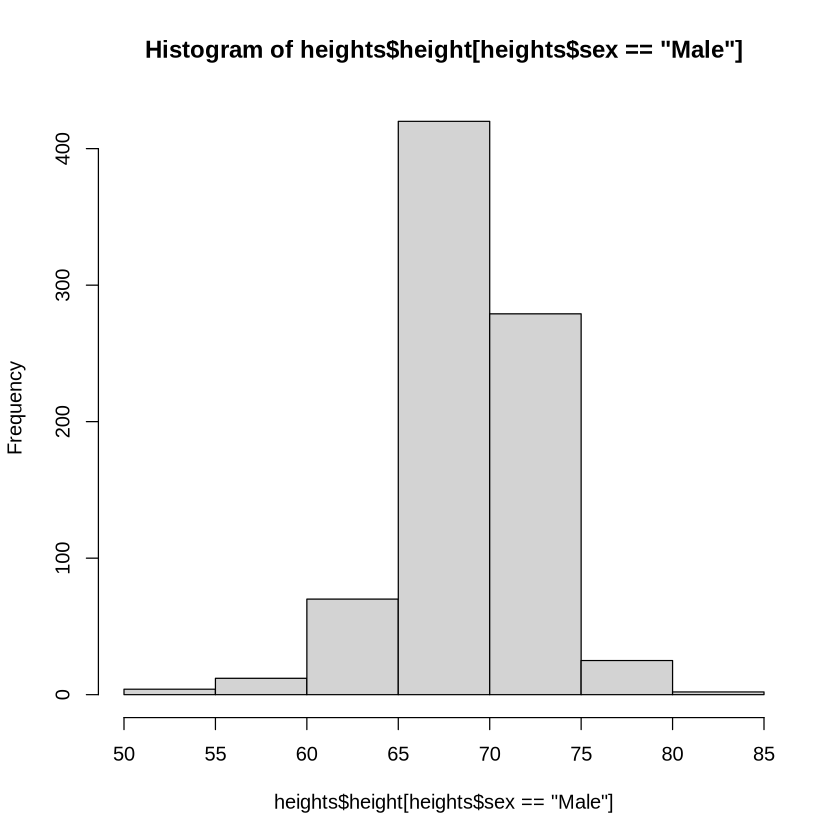

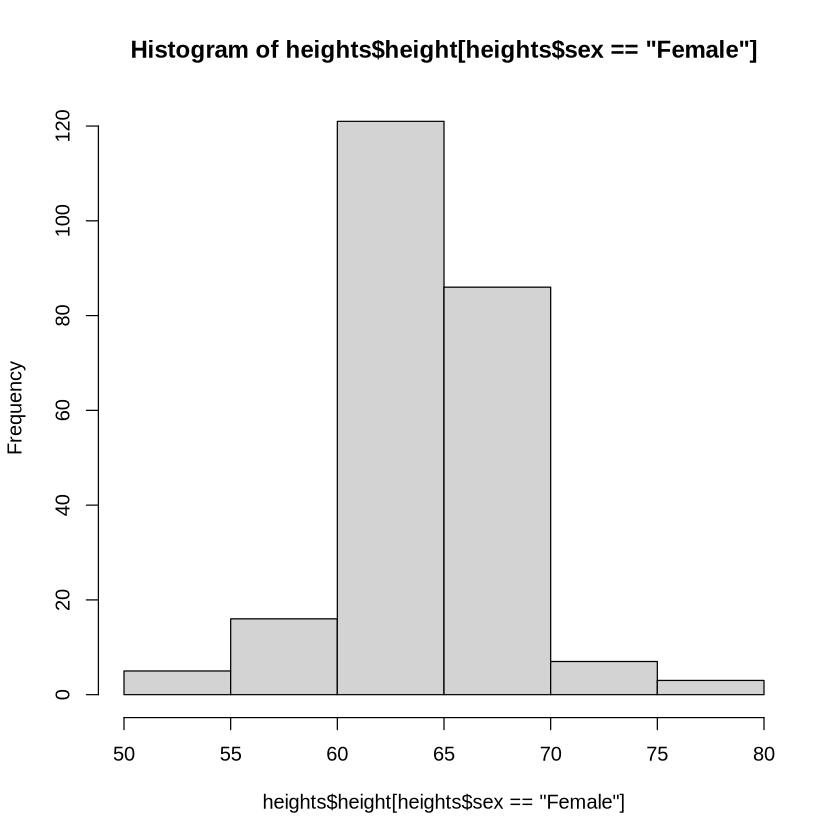

In [9]:
#looking into the variable height inside the dataframe heights
# first get the coloumn we want the information from, and then the indencies

hist(heights$height[heights$sex == 'Male'])
hist(heights$height[heights$sex == 'Female'])

... though it would be better if we could see all the data together on the same histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


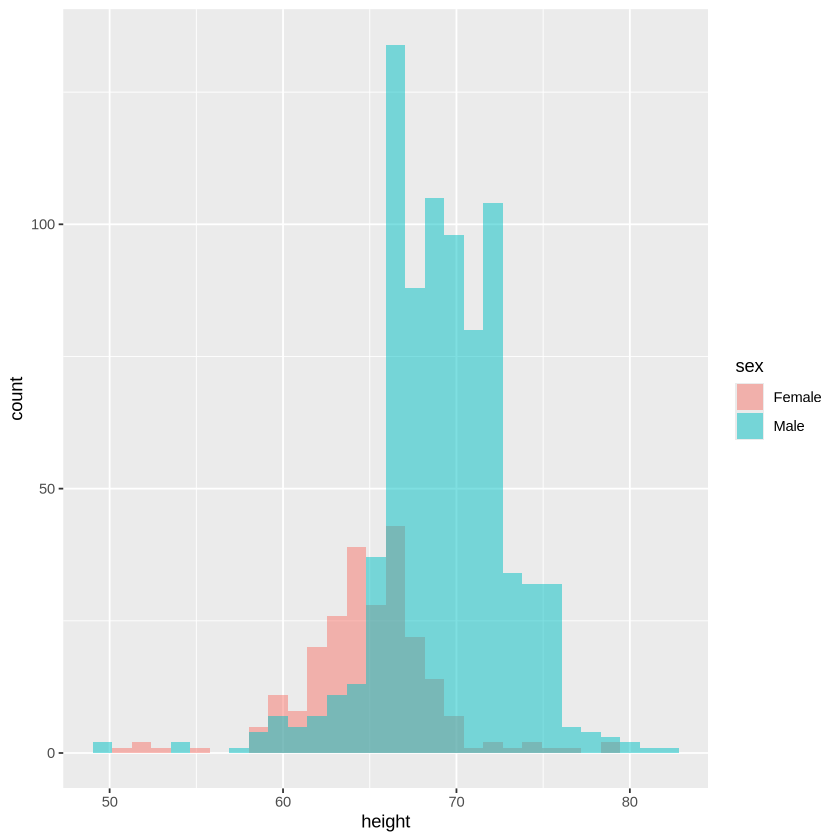

In [23]:
ggplot(heights,
       aes(x = height,
           fill = sex)) +
    geom_histogram(position = 'identity',
                   alpha = 0.5)

# not just plotting the frequency, since there is more observations from men (400) than female(120)
# if we werent writing the position and alpha, it would nok be as clear that the observations differ
# always pay attention to the volume of the data - on the histogram you can't see the difference.

# alpha changes the color transparency

In [12]:
stats_table <- heights %>%
    group_by(sex) %>%
    summarize(mean_height = mean(height),
              median_height = median(height),
              sd_height = sd(height))

# sd = standard deviation

stats_table

sex,mean_height,median_height,sd_height
<fct>,<dbl>,<dbl>,<dbl>
Female,64.93942,64.98031,3.760656
Male,69.31475,69.00000,3.611024


Let's look at the summary statistics - you can actually make them in 1 table!

In [14]:
# Shapiro test is a statistical test used to check whether the considered data is normally distributed data or no
shapiro.test(heights$height[heights$sex == "Male"])


	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Male"]
W = 0.96374, p-value = 2.623e-13


In [15]:
shapiro.test(heights$height[heights$sex == "Female"])


	Shapiro-Wilk normality test

data:  heights$height[heights$sex == "Female"]
W = 0.94255, p-value = 4.671e-08


In [16]:
# the W-value should be as close to 1 as possible, and the p-valie as small as possible
# we see the p-value for men is smaller, because there is more observations which makes the data more statistically significant

Lets try visualising the data in terms of probability distributions

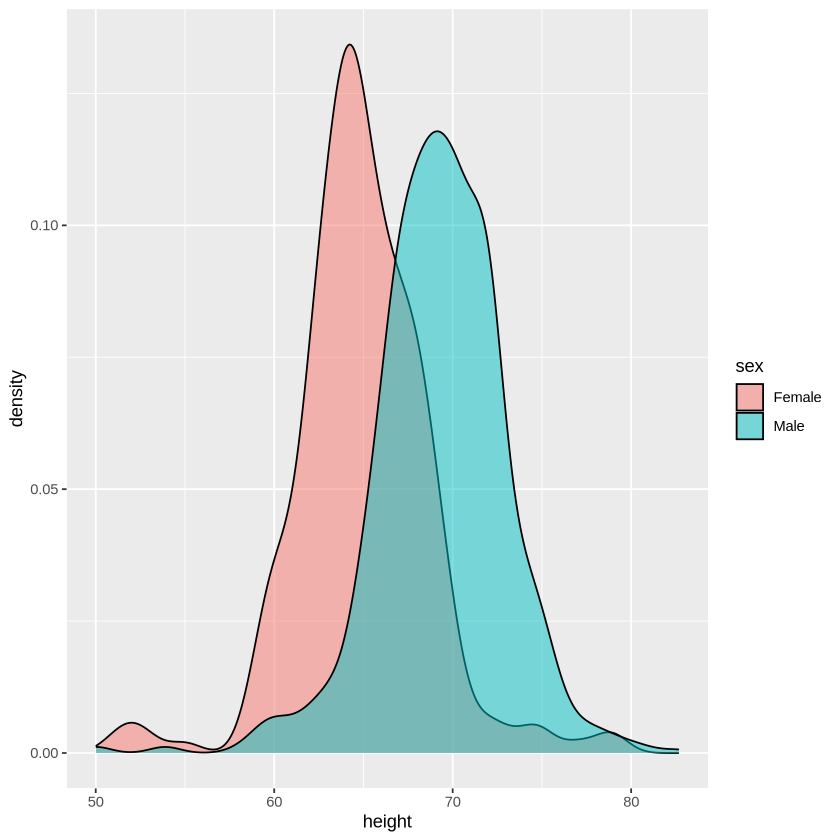

In [18]:
ggplot(heights,
       aes(x = height,
           fill = sex)) +
    geom_density(alpha = 0.5)

# this plot is telling us the probalility
# the are under the curve all sums up to 1 - so the probalility of having a height = 100% (since everyone has a height)
# The scale shows us you have a higher probalility to have a median height, than being higher and lower than this.
# Therefore, it basiclly shows us there is a lot of women and men who have the same heights

Now we are ready to run a hypothesis test. Are men taller than women? What sort of t test should we do?

In [19]:
# ~ defines the relationsship between the data
t.test(height ~ sex, data = heights)


	Welch Two Sample t-test

data:  height by sex
t = -15.925, df = 374.41, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -4.915553 -3.835108
sample estimates:
mean in group Female   mean in group Male 
            64.93942             69.31475 


In [25]:
# p-value = 2.2e-16 which has the scientific notation of 0.00000000000000022
# Therefore, the p-value is below 0.05 which means there is statistically significance

# 95% change that the actual difference is somewhere between confidence interval: -4.915 .. and -3.835
# = meaning women are shorter with -4.915 and men -3.835

# The t-distribution = the probalility distribution = in this case -15.925 
# * Higher values of the t-score indicate that a large difference exists between the two sample sets. 
# * The smaller the t-value, the more similarity exists between the two sample

# Exercise 2 - Some more messy real world data

We have been dealing with data that is fairly well organised. Let's look at some data that is slightly more messy

Install and load the fuelconomy package, which has fuel economy data from the EPA: https://cran.r-project.org/web/packages/fueleconomy/fueleconomy.pdf

In [26]:
install.packages('fueleconomy')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [28]:
library(fueleconomy)

In [33]:
data(vehicles) # loading the data from library about cars

In [34]:
head(vehicles) 

id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
13309,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,2.2,Regular,26,20
13310,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,2.2,Regular,28,22
13311,Acura,2.2CL/3.0CL,1997,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6,3.0,Regular,26,18
14038,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,4,2.3,Regular,27,19
14039,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Manual 5-spd,Front-Wheel Drive,4,2.3,Regular,29,21
14040,Acura,2.3CL/3.0CL,1998,Subcompact Cars,Automatic 4-spd,Front-Wheel Drive,6,3.0,Regular,26,17


In [32]:
str(vehicles) # to see the structure of the data 

tibble [33,442 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:33442] 13309 13310 13311 14038 14039 ...
 $ make : chr [1:33442] "Acura" "Acura" "Acura" "Acura" ...
 $ model: chr [1:33442] "2.2CL/3.0CL" "2.2CL/3.0CL" "2.2CL/3.0CL" "2.3CL/3.0CL" ...
 $ year : num [1:33442] 1997 1997 1997 1998 1998 ...
 $ class: chr [1:33442] "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" ...
 $ trans: chr [1:33442] "Automatic 4-spd" "Manual 5-spd" "Automatic 4-spd" "Automatic 4-spd" ...
 $ drive: chr [1:33442] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:33442] 4 4 6 4 4 6 4 4 6 5 ...
 $ displ: num [1:33442] 2.2 2.2 3 2.3 2.3 3 2.3 2.3 3 2.5 ...
 $ fuel : chr [1:33442] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:33442] 26 28 26 27 29 26 27 29 26 23 ...
 $ cty  : num [1:33442] 20 22 18 19 21 17 20 21 17 18 ...


In [ ]:
# when looking up the librabry through a google search "CRAN fuel economy" we can see what the variables are, for instance:
# hwy = highway fuel economy in mpg
# cty = city fuel economy in mpg

Let's set ourselves the task of comparing the city fuel economy of the midsize class of two car brands: Audi and VW

Our first step is to isolate the relevant data. There are many ways to do this. Here's one:

In [35]:
# Creating dataframe to store all data from all Audi middle sized cars
Audi_Midsize <- vehicles %>%
    filter(make == "Audi" & class == "Midsize Cars")

In [37]:
# We do the same for Volkswagen 
VW_Midsize <- vehicles %>%
    filter(make == "Volkswagen" & class == "Midsize Cars")

How many cars do we have in each group?

In [40]:
nrow(Audi_Midsize) # returns the number of rows = the number of midsized cars
nrow(VW_Midsize)

[1] 157

[1] 97

Let's use t.test to compare performance of the two cars

In [41]:
# because we have two different dataframes, we are not using the ~ (tilde)
t.test(Audi_Midsize$cty, VW_Midsize$cty)


	Welch Two Sample t-test

data:  Audi_Midsize$cty and VW_Midsize$cty
t = -7.1511, df = 125.12, p-value = 6.348e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.232765 -2.397743
sample estimates:
mean of x mean of y 
 16.29299  19.60825 


In [42]:
# Very small p-value = 6.348e-11
# Based on the p-value we shouldnt reject the hypothesis

Let's visualise the data and see if this is the best way to ask our question

In [43]:
# Putting the data into one dataframe
Audi_VW <- rbind(Audi_Midsize, VW_Midsize)

In [47]:
nrow(Audi_VW) # we can see we have combined the two dataframes, based on the row number

[1] 254

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


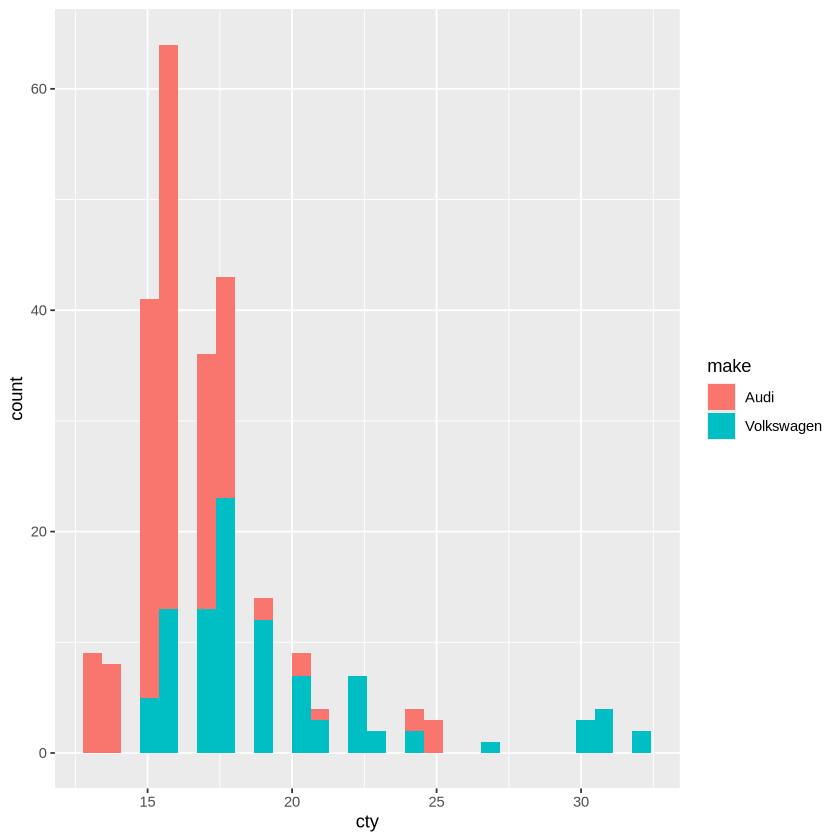

In [51]:
ggplot(Audi_VW,
       aes(x = cty,
           fill = make))+
    geom_histogram()

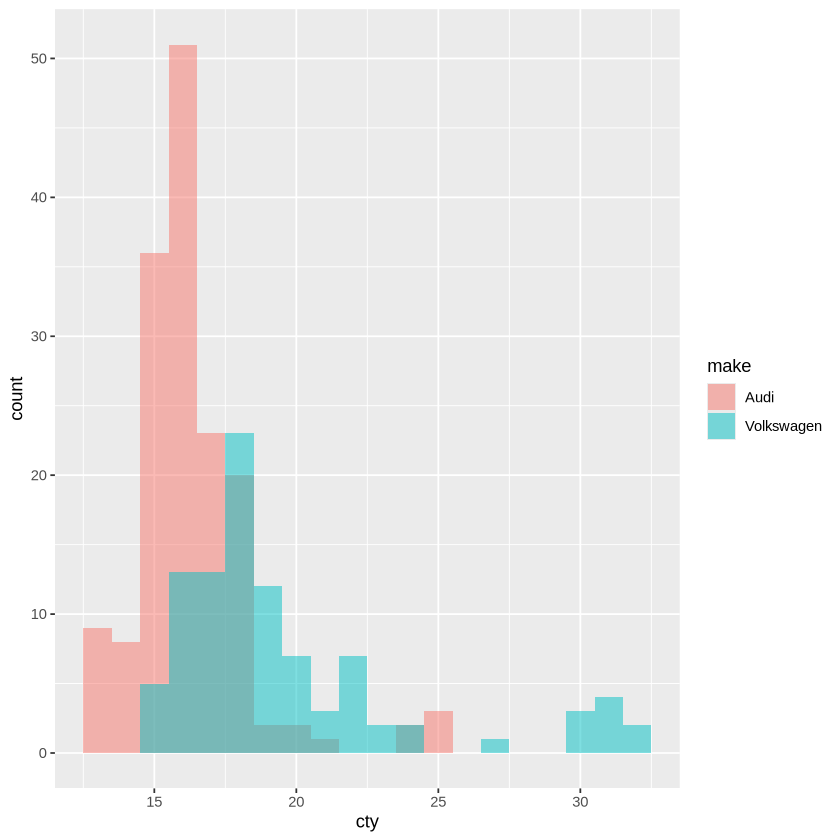

In [56]:
# Example of what position and aplha does

ggplot(Audi_VW,
       aes(x = cty,
           fill = make))+
    geom_histogram(position = 'identity',
                   alpha = 0.5,
                   bins = 20)

# bins = 20 since there is about 20 values for us to look at

In [ ]:
# We see this is not a normal distribution, since there is gaps between 25 and 30 (cty)

In [58]:
# We try to run a shapiro test
shapiro.test(Audi_Midsize$cty)
shapiro.test(VW_Midsize$cty)


	Shapiro-Wilk normality test

data:  Audi_Midsize$cty
W = 0.80939, p-value = 4.961e-13



	Shapiro-Wilk normality test

data:  VW_Midsize$cty
W = 0.77643, p-value = 7.732e-11


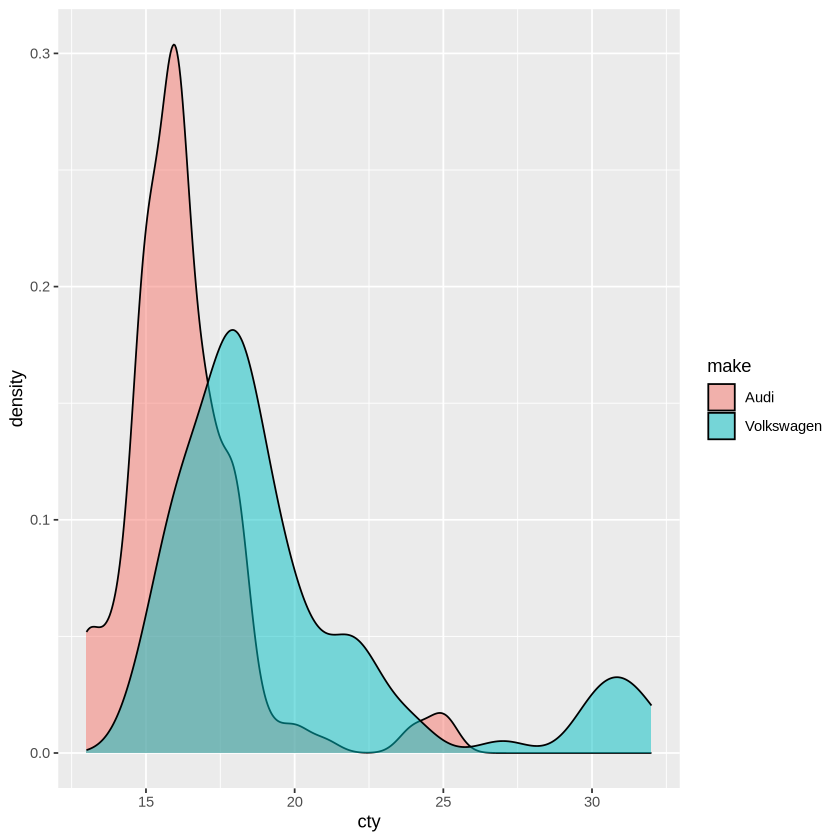

In [59]:
# We try to get a better look at the tails
ggplot(Audi_VW,
       aes(x = cty,
           fill = make)) +
    geom_density(alpha = 0.5)

We see that a normal distribution is an okay model for our data, but perhaps not the best one. We can see something important happening in the tails suggesting there is important structure we will miss.

Let's investigate that structure

In [60]:
str(Audi_VW)

tibble [254 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:254] 5656 5657 6784 6785 7908 ...
 $ make : chr [1:254] "Audi" "Audi" "Audi" "Audi" ...
 $ model: chr [1:254] "100" "100" "100" "100" ...
 $ year : num [1:254] 1989 1989 1990 1990 1991 ...
 $ class: chr [1:254] "Midsize Cars" "Midsize Cars" "Midsize Cars" "Midsize Cars" ...
 $ trans: chr [1:254] "Automatic 3-spd" "Manual 5-spd" "Automatic 3-spd" "Automatic 4-spd" ...
 $ drive: chr [1:254] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:254] 5 5 5 5 5 6 6 6 6 6 ...
 $ displ: num [1:254] 2.3 2.3 2.3 2.3 2.3 2.8 2.8 2.8 2.8 2.8 ...
 $ fuel : chr [1:254] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:254] 20 23 20 22 22 23 22 24 22 24 ...
 $ cty  : num [1:254] 17 16 16 16 16 15 17 17 17 17 ...


Let's make a scatterplot

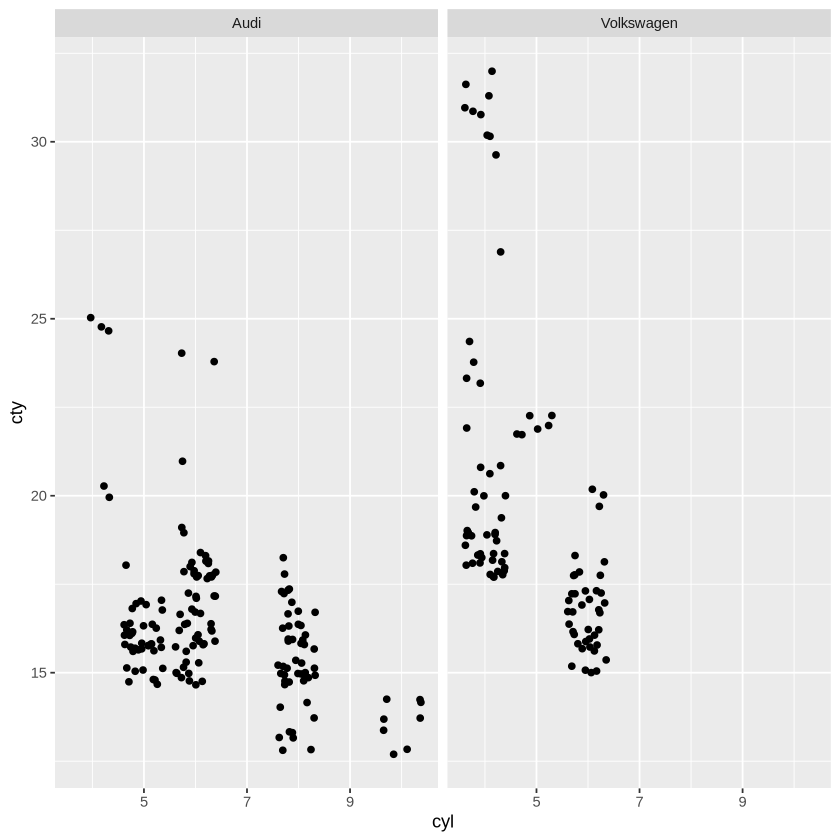

In [64]:
# cyl = how many cylinders there is in a car
ggplot(Audi_VW,
       aes(x = cyl,
           y = cty)) +
    geom_point(position = "jitter") + 
    facet_wrap(~make) # creates two plots for each manufacturer